In [1]:
from oauth2client.client import GoogleCredentials

from google.colab import auth as google_auth
google_auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
dataset_dir = '/content/gdrive/My Drive/data'


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
data = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/data/poultry_diseases')

Found 6467 files belonging to 4 classes.


In [5]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-04-17 06:18:01--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-04-17 06:18:02 (98.8 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [6]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [7]:
walk_through_dir("/content/gdrive/MyDrive/data/poultry_diseases")

There are 4 directories and 0 images in '/content/gdrive/MyDrive/data/poultry_diseases'.
There are 0 directories and 376 images in '/content/gdrive/MyDrive/data/poultry_diseases/ncd'.
There are 0 directories and 2103 images in '/content/gdrive/MyDrive/data/poultry_diseases/cocci'.
There are 0 directories and 2276 images in '/content/gdrive/MyDrive/data/poultry_diseases/salmo'.
There are 0 directories and 1712 images in '/content/gdrive/MyDrive/data/poultry_diseases/healthy'.


In [8]:
cocci= os.listdir('/content/gdrive/MyDrive/data/poultry_diseases/cocci')
print(cocci[0:5])
print(cocci[-5:])

['cocci.1419.jpg', 'cocci.897.jpg', 'cocci.885.jpg', 'cocci.425.jpg', 'cocci.788.jpg']
['cocci.2095.jpg', 'cocci.958.jpg', 'cocci.1750.jpg', 'cocci.1425.jpg', 'cocci.335.jpg']


In [9]:
healthy= os.listdir('/content/gdrive/MyDrive/data/poultry_diseases/healthy')
print(healthy[0:5])
print(healthy[-5:])

['healthy.1643.jpg', 'healthy.1644.jpg', 'healthy.164.jpg', 'healthy.1642.jpg', 'healthy.1646.jpg']
['healthy.1632.jpg', 'healthy.1626.jpg', 'healthy.1638.jpg', 'healthy.1640.jpg', 'healthy.1637.jpg']


In [10]:
ncd= os.listdir('/content/gdrive/MyDrive/data/poultry_diseases/ncd')
print(ncd[0:5])
print(ncd[-5:])

['ncd.112.jpg', 'ncd.110.jpg', 'ncd.1.jpg', 'ncd.106.jpg', 'ncd.100.jpg']
['ncd.98.jpg', 'ncd.77.jpg', 'ncd.84.jpg', 'ncd.85.jpg', 'ncd.90.jpg']


In [11]:
salmo= os.listdir('/content/gdrive/MyDrive/data/poultry_diseases/salmo')
print(salmo[0:5])
print(salmo[-5:])

['salmo.2154.jpg', 'salmo.2134.jpg', 'salmo.2133.jpg', 'salmo.2155.jpg', 'salmo.2143.jpg']
['salmo.1238.jpg', 'salmo.1233.jpg', 'salmo.1243.jpg', 'salmo.1248.jpg', 'salmo.1253.jpg']


In [12]:
cocci_labels = [0]*2103

healthy_labels = [1]*1712

ncd_labels = [2]*376

salmo_labels = [3]*2276

In [13]:
print(cocci_labels[0:5])
print(healthy_labels[0:5])
print(ncd_labels[0:5])
print(salmo_labels[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[2, 2, 2, 2, 2]
[3, 3, 3, 3, 3]


In [14]:


labels=cocci_labels+healthy_labels+ncd_labels+salmo_labels
labels
print(len(labels))


6467


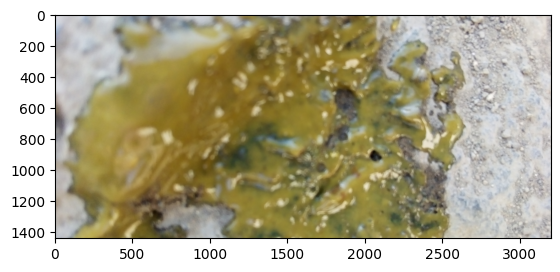

In [15]:
img = mpimg.imread('/content/gdrive/MyDrive/data/poultry_diseases/cocci/cocci.0.jpg')
imgplot = plt.imshow(img)
plt.show()

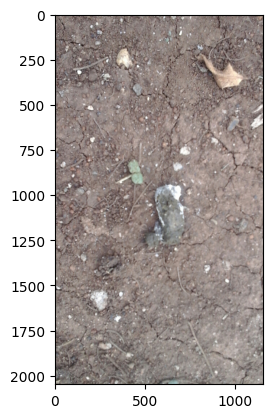

In [16]:
img = mpimg.imread('/content/gdrive/MyDrive/data/poultry_diseases/healthy/healthy.0.jpg')
imgplot = plt.imshow(img)
plt.show()

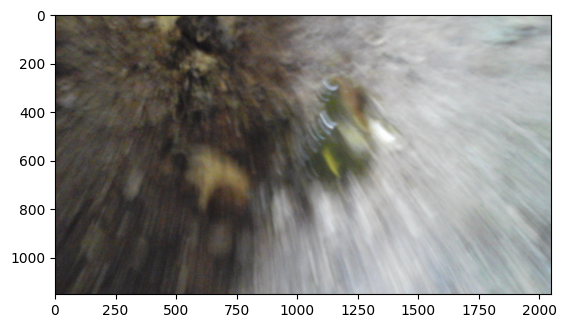

In [17]:
img = mpimg.imread('/content/gdrive/MyDrive/data/poultry_diseases/ncd/ncd.0.jpg')
imgplot = plt.imshow(img)
plt.show()

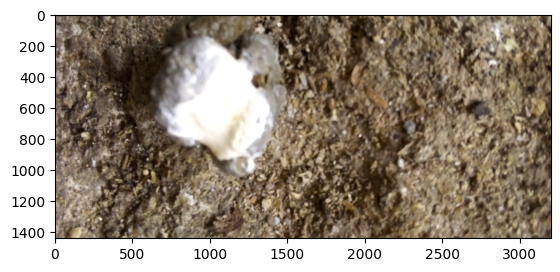

In [18]:
img = mpimg.imread('/content/gdrive/MyDrive/data/poultry_diseases/salmo/salmo.0.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import os
from os.path import join
import cv2
import numpy as np
from PIL import Image

def apply_histogram_equalization(img):
    # Convert the image to YUV color space
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    # Apply histogram equalization to the Y channel (luminance)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    # Convert the image back to BGR color space
    equalized_img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    return equalized_img

directories = ['/content/gdrive/MyDrive/data/poultry_diseases/cocci',
               '/content/gdrive/MyDrive/data/poultry_diseases/healthy',
               '/content/gdrive/MyDrive/data/poultry_diseases/ncd',
               '/content/gdrive/MyDrive/data/poultry_diseases/salmo']

data = [[] for _ in range(len(directories))]
for i, directory in enumerate(directories):
    files = os.listdir(directory)
    for img_file in files:
        image_path = join(directory, img_file)
        print("Attempting to open:", image_path)
        try:
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, (224, 224))
                equalized_img = apply_histogram_equalization(image)
                data[i].append(equalized_img)  # Append the processed image to the corresponding list
        except Exception as e:
            print("Error:", e)

Attempting to open: /content/gdrive/MyDrive/data/poultry_diseases/cocci/cocci.343.jpg
Attempting to open: /content/gdrive/MyDrive/data/poultry_diseases/cocci/cocci.680.jpg
Attempting to open: /content/gdrive/MyDrive/data/poultry_diseases/cocci/cocci.1520.jpg
Attempting to open: /content/gdrive/MyDrive/data/poultry_diseases/cocci/cocci.1096.jpg
Attempting to open: /content/gdrive/MyDrive/data/poultry_diseases/cocci/cocci.2098.jpg
Attempting to open: /content/gdrive/MyDrive/data/poultry_diseases/cocci/cocci.1928.jpg
Attempting to open: /content/gdrive/MyDrive/data/poultry_diseases/cocci/cocci.219.jpg
Attempting to open: /content/gdrive/MyDrive/data/poultry_diseases/cocci/cocci.1310.jpg
Attempting to open: /content/gdrive/MyDrive/data/poultry_diseases/cocci/cocci.1603.jpg
Attempting to open: /content/gdrive/MyDrive/data/poultry_diseases/cocci/cocci.1209.jpg
Attempting to open: /content/gdrive/MyDrive/data/poultry_diseases/cocci/cocci.240.jpg
Attempting to open: /content/gdrive/MyDrive/dat

In [ ]:
type(data)

In [ ]:
len(data)

6467

array([[[198, 166, 121],
        [199, 168, 124],
        [199, 169, 127],
        ...,
        [122,  89,  56],
        [122,  91,  55],
        [123,  87,  53]],

       [[200, 169, 124],
        [201, 170, 126],
        [200, 169, 126],
        ...,
        [135, 103,  70],
        [133, 100,  67],
        [132,  99,  64]],

       [[196, 165, 123],
        [197, 165, 124],
        [197, 165, 125],
        ...,
        [139, 108,  72],
        [137, 104,  69],
        [136, 103,  68]],

       ...,

       [[ 35,  23,  18],
        [ 35,  21,  18],
        [ 34,  19,  17],
        ...,
        [ 15,   1,   1],
        [ 13,   0,   0],
        [ 12,   1,   0]],

       [[ 52,  39,  29],
        [ 51,  38,  29],
        [ 47,  34,  25],
        ...,
        [ 15,   1,   1],
        [ 14,   1,   1],
        [ 13,   2,   1]],

       [[ 60,  48,  32],
        [ 60,  47,  33],
        [ 55,  42,  29],
        ...,
        [ 19,   3,   4],
        [ 16,   3,   3],
        [ 15,   4,   3]]], dtype=uint8)
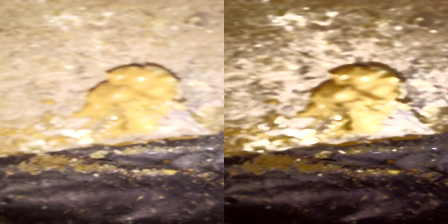

In [ ]:
data[0]

In [ ]:
data[0].shape

(224, 448, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for image augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Apply histogram equalization and image augmentation to each image
augmented_data = []

for images in data:
    augmented_images = []
    for image in images:
        # Apply image augmentation
        augmented_image = datagen.random_transform(image)
        augmented_images.append(augmented_image)
    augmented_data.append(augmented_images)

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 448, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 448, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 224, 448, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 224, 448, 3)          0         ['normalization_1[0][0]'

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
130/130 [==============================] - 11s 53ms/step - loss: 36.0683 - accuracy: 0.5694 - val_loss: 0.9855 - val_accuracy: 0.6242
Epoch 2/10
130/130 [==============================] - 6s 46ms/step - loss: 0.7858 - accuracy: 0.7395 - val_loss: 0.9990 - val_accuracy: 0.6493
Epoch 3/10
130/130 [==============================] - 5s 42ms/step - loss: 0.2885 - accuracy: 0.9060 - val_loss: 1.2972 - val_accuracy: 0.6444
Epoch 4/10
130/130 [==============================] - 6s 45ms/step - loss: 0.0801 - accuracy: 0.9773 - val_loss: 1.6032 - val_accuracy: 0.7014
Epoch 5/10
130/130 [==============================] - 6s 45ms/step - loss: 0.0503 - accuracy: 0.9886 - val_loss: 2.1476 - val_accuracy: 0.6889
Epoch 6/10
130/130 [==============================] - 6s 43ms/step - loss: 0.0158 - accuracy: 0.9961 - val_loss: 2.2870 - val_accuracy: 0.6966
Epoch 7/10
130/130 [==============================] - 6s 45ms/step - loss: 0.0183 - accuracy: 0.9949 - val_loss: 2.0717 - val_accuracy: 0.67

In [ ]:
model.evaluate(X_test,Y_test)

41/41 [==============================] - 4s 107ms/step - loss: 0.1278 - accuracy: 0.9567


[0.1278020292520523, 0.9567233324050903]

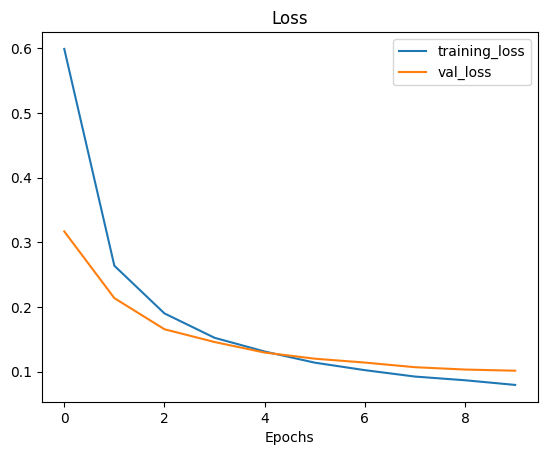

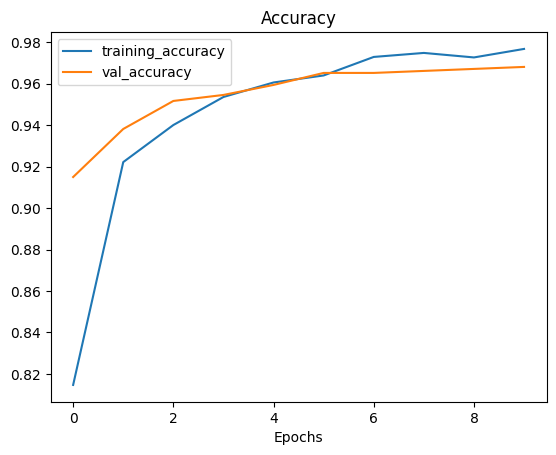

In [ ]:
plot_loss_curves(history)